In [1]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

# Optical Polarisation

Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

***Task 0***

Calculate the light intensity $I$ for the following forms of polarised light passing through a linear analyser as a function of the analyser's angle $θ$ with the vertical direction. 

Consider:

(a) Linear polarised light (angle $\alpha$ between polarisation direction and vertical).

(b) Circularly polarised light (angle $\phi$ between fast axis of the $\frac{\lambda}{4}$ - waveplate and the vertical).

(c) Linearly polarised light passing first through a $\frac{\lambda}{4}$ - waveplate before entering the linear analyser.

- Consider the special cases when $\alpha = \phi$ , $\alpha = \phi \pm \frac{\pi}{2}$ , $\alpha = \phi \pm \pi$ and $\alpha = \phi \pm \frac{\pi}{4}$. 

(d) Circularly polarised light passing first through a $\frac{\lambda}{4}$ – waveplate before entering the analyser.

- Cosider the case of $\phi = \pm\frac{\pi}{4}$

***Task 1***

Experimentally measure the light intensity as a function of the analyser angle for linear polarised light that passed through a $\frac{\lambda}{4}$ – plate under angles of 

- $\phi = 0^\circ$

- $\phi = 30^\circ$

- $\phi = 45^\circ$

Compare the measurements to the calculations from the first task by making nonlinear fits to the data or by plotting the theoretical prediction curves.

***Task 2***

Characterise the state of polarisation of three unknown black boxes in front of a light source using appropriate measurements. 

In [2]:
# GLOBALS
task_1_title_str = ['0', '30', '45'] # Degrees
phi_l = [0, np.pi/6, np.pi/4]

## Task 0: Calculate the light intensity $I$ of polarised light

***Task Definition*** 

Calculate the theoretical light intensity $I$ for the following forms of polarised light passing through a linear analyser as a function of the analyser's angle $θ$ with the vertical direction. 

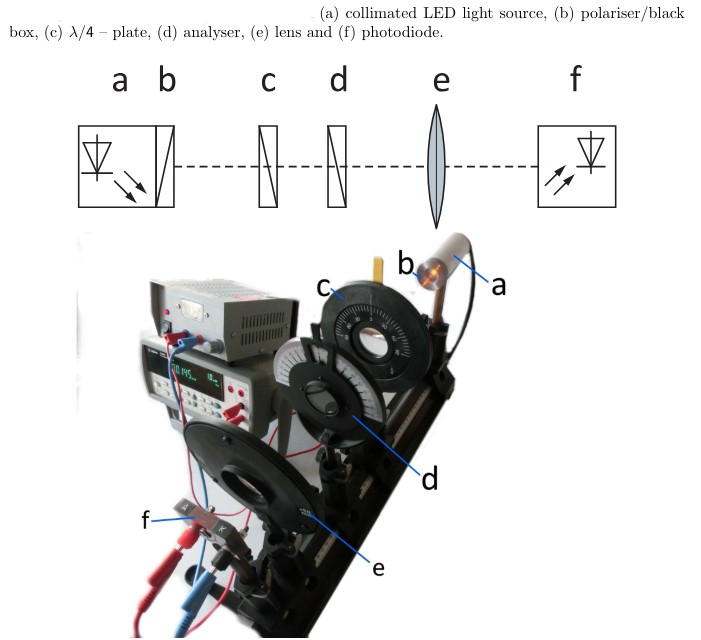

<IPython.core.display.Latex object>

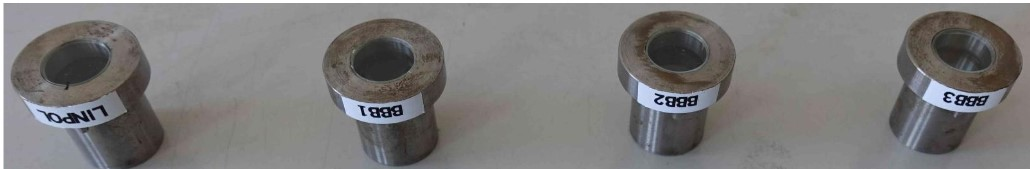

<IPython.core.display.Latex object>

In [3]:
dy(Im("./img/A1.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 1.1$: Optical Analyser Setup'))

dy(Im("./img/A2.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 1.2$: Polarisers'))

***Theoretical Basis*** 

In this experiment, unpolarised light passes through 3 optical elements in the following sequence: (Polariser&rarr;Quarter Waveplate&rarr;Analyzer) 

The theory of Jones Calculas states that electromagnetic waves are represented by Jones Vectors while the effects of optical elements may be characterized by Jones matrices.

**Jones Vector**

An electromagnetic wave's Jones Vector is given by: 
$$
J_{\alpha} = \begin{pmatrix}
sin{\alpha} \\
cos{\alpha} \\
\end{pmatrix}
$$

- $\alpha$ : Angle between polariser's transmission axis and the vertical

The Jones vectors for vertical linearly, right circular and left circularly polarised light are respectively given by:

$$
\begin{array}{ccc}
J_{y} = \begin{pmatrix}
0 \\
1 
\end{pmatrix} & \quad
J_{+} = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\
-i
\end{pmatrix} & \quad
J_{-} = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\
+i
\end{pmatrix}
\end{array}
$$



**Jones Matrices**

Analyzer:

$$
\begin{array}{ccc}
M_{\theta} = \begin{pmatrix}
sin^2(\theta) & sin(\theta)cos(\theta) \\
sin(\theta)cos(\theta) & cos^2(\theta)
\end{pmatrix}
\end{array}
$$

$\frac{\lambda}{4}$- Waveplate:

$$
\begin{array}{ccc}
M^{\phi}_{\lambda/4} = \frac{1}{\sqrt2}\begin{pmatrix}
1+icos(2\phi) & -isin(2\phi) \\
-isin(2\phi) & 1-icos(2\phi)
\end{pmatrix}
\end{array}
$$

- $\phi$ : Angle between fast axis of waveplate and vertical
- $\theta$ : Angle between analyzer's transmission axis and vertical

Therefore, the final Jones Vector $J_T$ after passing through all 3 optical elements is given by:

$$ J_T = M_{\theta} M^{\phi}_{\lambda/4} J_{\alpha} \label{eq1.1} \tag{1.1}$$

It is also given that the transmitted light intensity: $$I_T \propto |J_T|^2 $$
$$I_T = I_0|J_T|^2 \label{eq1.2} \tag{1.2}$$
- $I_0$ : Proportionality constant

***Procedure***

1. The transmission axes of LPOL and the analyzer must first be calibrated without the quarter-waveplate. **Fig 1.2**
<br>

2. Unpolarized Light is passed through LPOL which makes it polarised with respect to the transmission axis of LPOL. 
<br>

3. Subsequently, the polarized light is incident on the analyzer with ($\theta= 0^{\circ}$), and the light's intensity is measured using a connected voltmeter.
<br>

4. LPOL is slowly rotated until the voltmeter reaches its maximum value. This implies that both LPOL and the analyzer have the same transmission axes. ($\theta= \alpha = 0^{\circ}$)
<br>

5. Thereafter, the quarter-waveplate is placed back into the setup, and the angle $\phi$ is configured to a preset value of either ($0^{\circ} , 30^{\circ}$ or $45^{\circ}$) **Fig 1.1**
</br>
6. The analyzer’s angle $\theta$ is varied from ($-90^{\circ}$ to $90^{\circ}$), and the light’s intensity $I_T$ is measured using the voltmeter. This is done for each value of $\phi$, and the measurements are used to plot graphs of $I_T(\theta)$.



**Tranmistted Light intensity $I_T$ Calculations**

We are asked to compute the general expressions for following cases of $I_T(\theta)$. This may be easily done by applying [Eq 1.2](#mjx-eqn-eq1.2).

(a) Linear polarised light with no quarter-waveplate: $$I_T = I_0|M_{\theta} J_{\alpha}|^2$$

(b) Circularly polarised light with no quarter waveplate: $$I_T = I_0|M_{\theta} J_{+}|^2$$
$$I_T = I_0|M_{\theta} J_{-}|^2$$

(c) Linearly polarised light passing first through a λ/4 - plate before entering the linear analyser.  

(ci) $\alpha = \phi$: $$ I_T = I_0 |M_{\theta} M^{\alpha}_{\frac{\lambda}{4}} J_{\alpha}|^2  $$

(cii) $\alpha = \phi \pm \pi$: $$ I_T = I_0 |M_{\theta} M^{\alpha \pm \pi}_{\frac{\lambda}{4}} J_{\alpha}|^2  $$

(ciii)  $\alpha = \phi \pm \frac{\pi}{4}$: $$ I_T = I_0 |M_{\theta} M^{\alpha \pm \frac{\pi}{4}}_{\frac{\lambda}{4}} J_{\alpha}|^2  $$

(d) Circularly polarised light passing first through a λ/4 – plate before entering the analyser.

(di) $\phi = \pm \frac{\pi}{4}$: $$ I_T = I_0 |M_{\theta} M^{\pm \frac{\pi}{4}}_{\frac{\lambda}{4}} J_{\alpha}|^2  $$

In [16]:
# Data Preprocessing
import glob
import os

# Define the folder path where the CSV files are located
folder_path = './data/Task1/'

# Use glob to get all CSV file paths in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Initialize an empty list to hold the DataFrames
data_frames = []

# Loop through the CSV file paths and read each into a DataFrame
for file_path in csv_files:
    df = pd.read_csv(file_path)
    df.columns = ['X', 'Y']
    data_frames.append(df)
    
#Optionally, print the DataFrames to verify their contents
#for i, df in enumerate(data_frames):
#    print(f"DataFrame {i+1}:")
#    print(df.head())

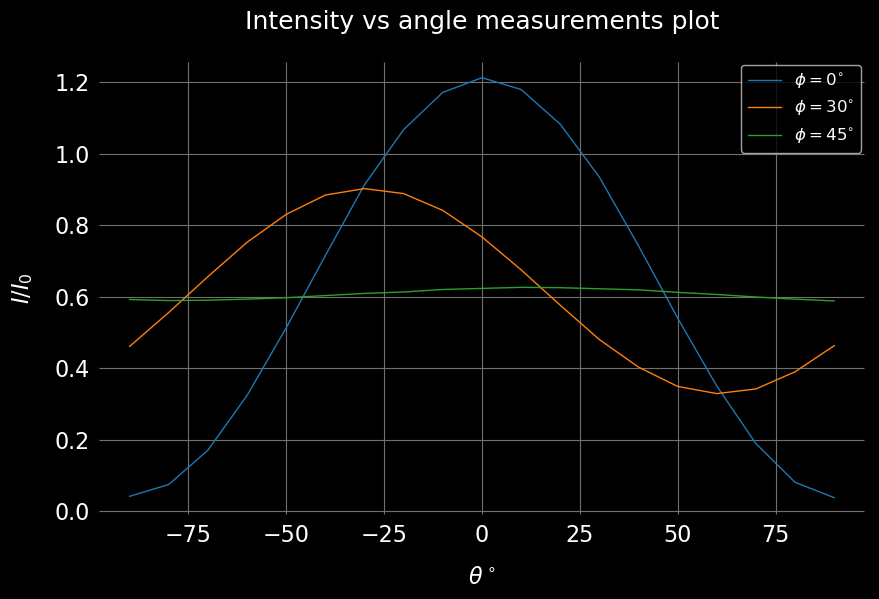

<IPython.core.display.Latex object>

In [17]:
x_l = []
y_l = []
a, b = 0, 1
for i, df in enumerate(data_frames):
    x = np.array(df['X'])
    y = np.array(df['Y'])
    #if i == 0: 
    #    b = y.max()
    #    a = y.min()
    #y = a + (y-a)/(b-a)
    x_l.append(x)
    y_l.append(y)
    plt.plot(x, y, label=r'$\phi = %s ^{\circ}$' % task_1_title_str[i])
    
#PLot Settings
plt.xlabel(r'$\theta^\circ$')
plt.ylabel(r'$I/I_0$')
plt.grid(True)
plt.title('Intensity vs angle measurements plot')
plt.legend()
plt.show()
dy(Lx(r'$Figure\, 1.1$: Light intensity vs analyser angle data plot.'))

## Task 1

***Task Definition*** 

Experimentally measure the light intensity as a function of the analyser angle for linear polarised light that passed through a $\frac{λ}{4}$ – plate under angles of $\phi = 0^\circ, 30^\circ$ and $45^\circ$.


***Theoretical Basis*** 

As stated in Task 0, $(\alpha = 0^\circ) \implies (J_{\alpha} = J_y)$ for this experiment.

This implies that $I_T \propto cos(\theta)^2$ by explicit computation of $|J_T|^2$ using [Eq 1.2](#mjx-eqn-eq1.2). This is known as Malus's Law.

Hence for all 3 values of $\phi$: $$I_T = Acos^2(\theta+\delta) \label{eq1.3} \tag{1.3}$$

- $\Delta$ : Phase Shift caused by changing $\phi$

- $A$ : Proportionality constant caused by changing $\phi$

[Eq 1.3](#mjx-eqn-eq1.3) shall be used as the fitting function. 

In [21]:
def int_func(x,offset, A, C):
    x = np.deg2rad(x)
    return A*np.cos(x+offset)**2 + C

def M_lamda4_plate(phi_arg):
    phi_arg = np.deg2rad(phi_arg)
    L_00 = complex(1,np.cos(2*phi_arg))
    L_01 = complex(0,-np.sin(2*phi_arg))
    L_11 = complex(1, -np.cos(2*phi_arg))
    M = np.array([[L_00, L_01],[L_01, L_11]], dtype=complex)
    return 1/np.sqrt(2) * M

def M_theta(theta_arg):
    theta_arg = np.deg2rad(theta_arg)
    L_00 = np.sin(theta_arg)**2
    L_01 = np.sin(theta_arg)*np.cos(theta_arg)
    L_11 = np.cos(theta_arg)**2
    M = np.array([[L_00, L_01],[L_01, L_11]], dtype=complex)
    return M

def J_t_squared_0(theta_arg,A):
    J_t_norm = []
    J_0 = np.transpose(np.array([0, 1], dtype=complex))
    tmp_mat = np.matmul(M_lamda4_plate(phi_l[0]),J_0)
    for x in theta_arg:
        J_t_i = np.matmul(M_theta(x),tmp_mat)
        J_t_norm_i = np.linalg.norm(J_t_i)
        J_t_norm.append(J_t_norm_i**2)
    return A*np.array(J_t_norm)

def J_t_squared_1(theta_arg,A):
    J_t_norm = []
    J_0 = np.transpose(np.array([0, 1], dtype=complex))
    tmp_mat = np.matmul(M_lamda4_plate(phi_l[1]),J_0)
    for x in theta_arg:
        J_t_i = np.matmul(M_theta(x),tmp_mat)
        J_t_norm_i = np.linalg.norm(J_t_i)
        J_t_norm.append(J_t_norm_i**2)
    return A*np.array(J_t_norm)

def J_t_squared_2(theta_arg,A):
    J_t_norm = []
    J_0 = np.transpose(np.array([0, 1], dtype=complex))
    tmp_mat = np.matmul(M_lamda4_plate(phi_l[2]),J_0)
    for x in theta_arg:
        J_t_i = np.matmul(M_theta(x),tmp_mat)
        J_t_norm_i = np.linalg.norm(J_t_i)
        J_t_norm.append(J_t_norm_i**2)
    return A*np.array(J_t_norm)

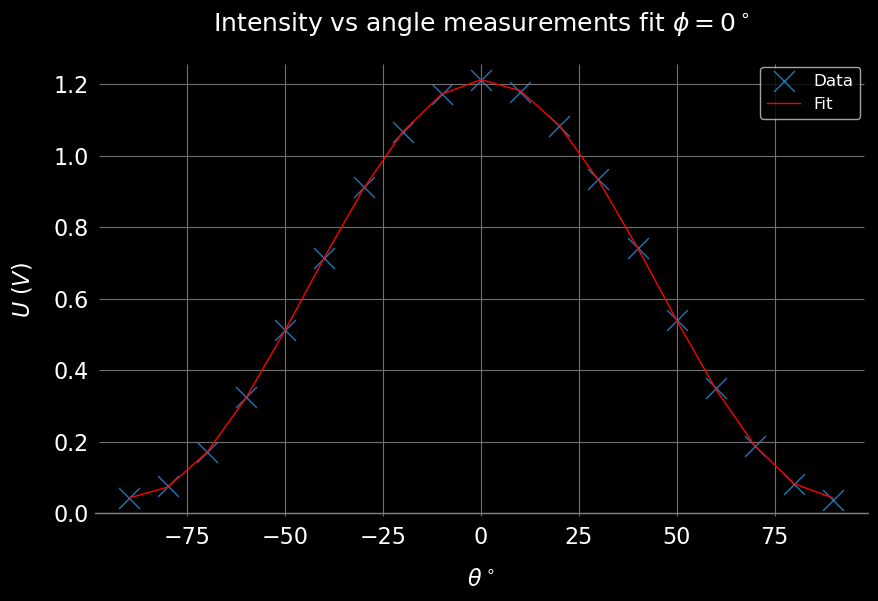

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

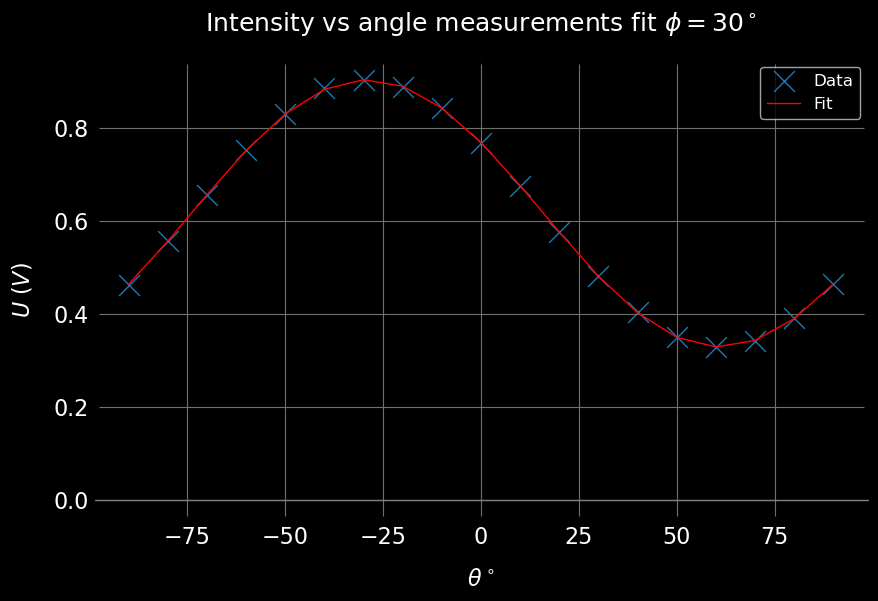

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

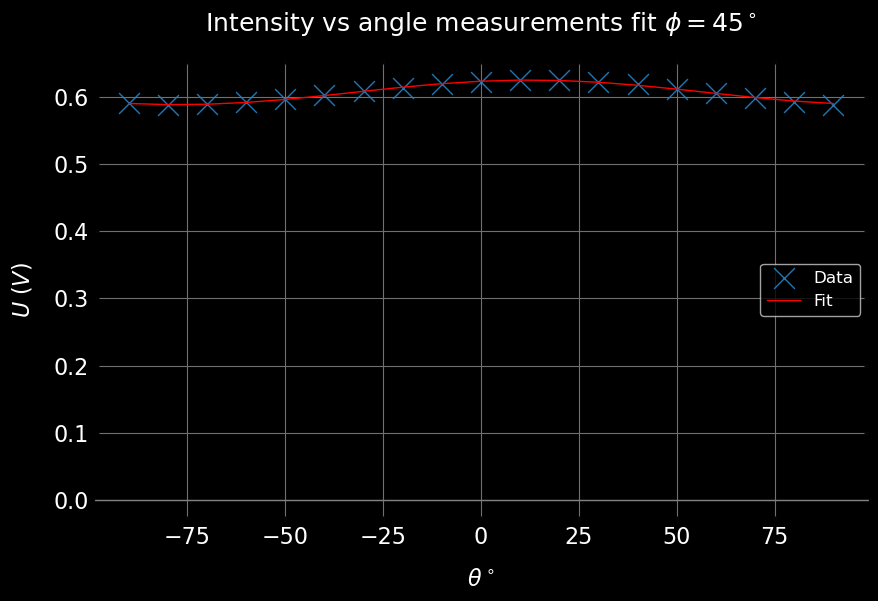

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [27]:
for i in range(len(x_l)):
    x = x_l[i]
    y = y_l[i]
    #if(i == 0): 
    #    fit = curve_fit(J_t_squared_0, x, y)
    #    fit_y = J_t_squared_0(x,fit[0][0])
    #elif(i == 1):
    #    fit = curve_fit(J_t_squared_1, x, y)
    #    fit_y = J_t_squared_1(x,fit[0][0])
    #elif(i == 2):
    #    fit = curve_fit(J_t_squared_2, x, y)
    #    fit_y = J_t_squared_2(x,fit[0][0])
    fit_check = curve_fit(int_func, x, y)
    #A = fit[0][0]
    #u_A = np.sqrt(fit[1][0][0])
    delta = fit_check[0][0]
    delta_deg = np.rad2deg(delta)
    u_delta = np.sqrt(fit_check[1][0][0])
    u_delta_deg = np.rad2deg(u_delta)
    I_0 = fit_check[0][1]
    u_I_0 = np.sqrt(fit_check[1][1][1])
    C = fit_check[0][2]
    u_C = np.sqrt(fit_check[1][2][2])
    
    y_fit_check = int_func(x, delta, I_0, C)
    
    plt.scatter(x, y, label='Data', marker='x')
    #plt.plot(x, fit_y, label="James' vector", color='r')
    plt.plot(x, y_fit_check, label=r'Fit', color = 'r')
    plt.axhline(0,color='grey')
    plt.xlabel(r'$\theta^\circ$')
    plt.ylabel(r'$U$ ($V$)')
    plt.grid(True)
    plt.title(r'Intensity vs angle measurements fit $\phi = %s ^\circ$' % task_1_title_str[i])
    plt.legend()
    plt.show()
    dy(Lx(r'$Figure\, 1.%d$: Light intensity vs analyser angle fitting for $\phi = %s ^\circ$.' % (2 + i, task_1_title_str[i])))
    #dy(Lx(r'$$A = %.2f ~ \pm %.3f$$' % (A, u_A)))
    dy(Lx(r'$$I_0 = %.2f ~ \pm %.3f$$' % (I_0, u_I_0)))
    dy(Lx(r'$$C = %.2f ~ \pm %.3f$$' % (C, u_C)))
    dy(Lx(r'$$\delta = (%.2f \pm %.3f)~^\circ $$' % (delta_deg, u_delta_deg)))

***Analysis***

## Task 2

***Task Definition*** 

Characterise the state of polarisation of three unknown black boxes in front of a light source using appropriate measurements.

***Theoretical Basis***

In the scope of this task, to determine the polarisation of three black boxes the following algorithm has been used:

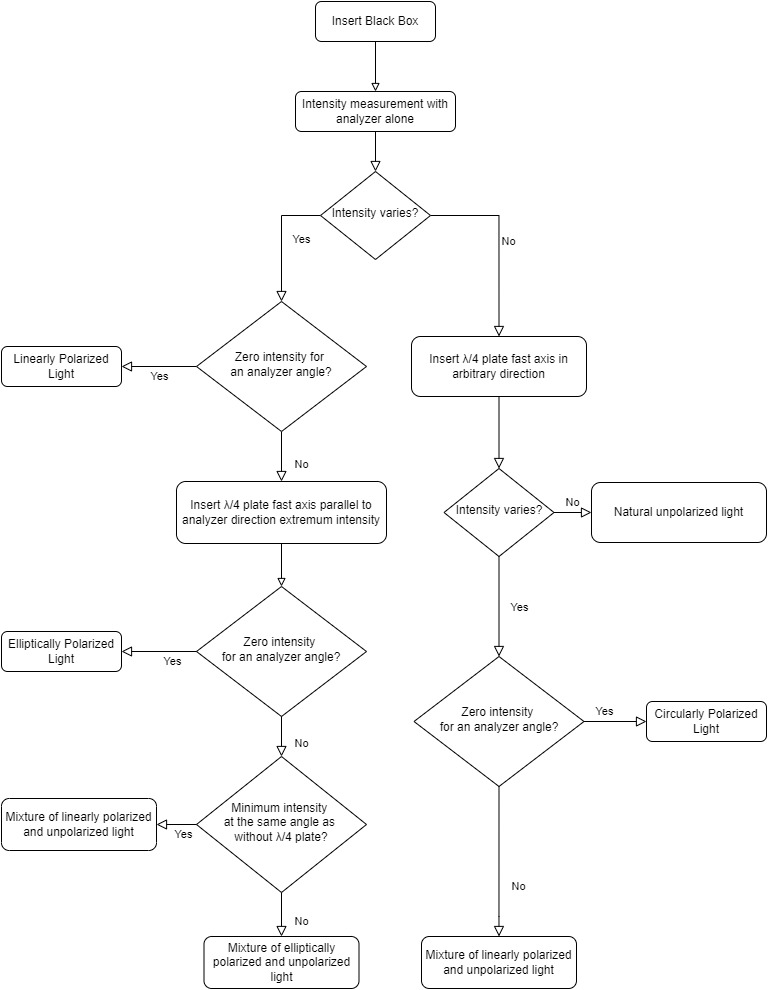

<IPython.core.display.Latex object>

In [10]:
dy(Im("./img/Diagram.jpg", height=800, width=800))
dy(Lx(r'$Figure\, 2.1$: Black Box polarization determination flowchart.'))

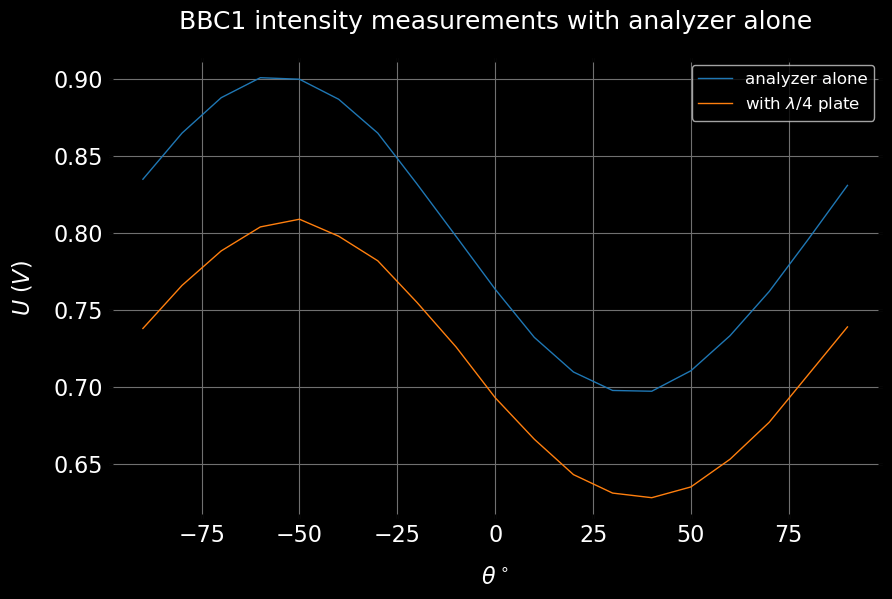

<IPython.core.display.Latex object>

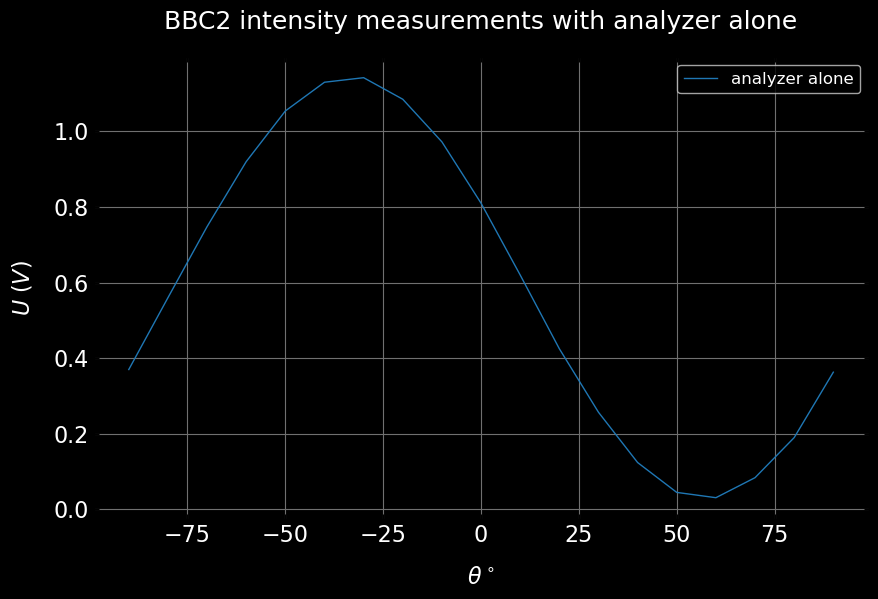

<IPython.core.display.Latex object>

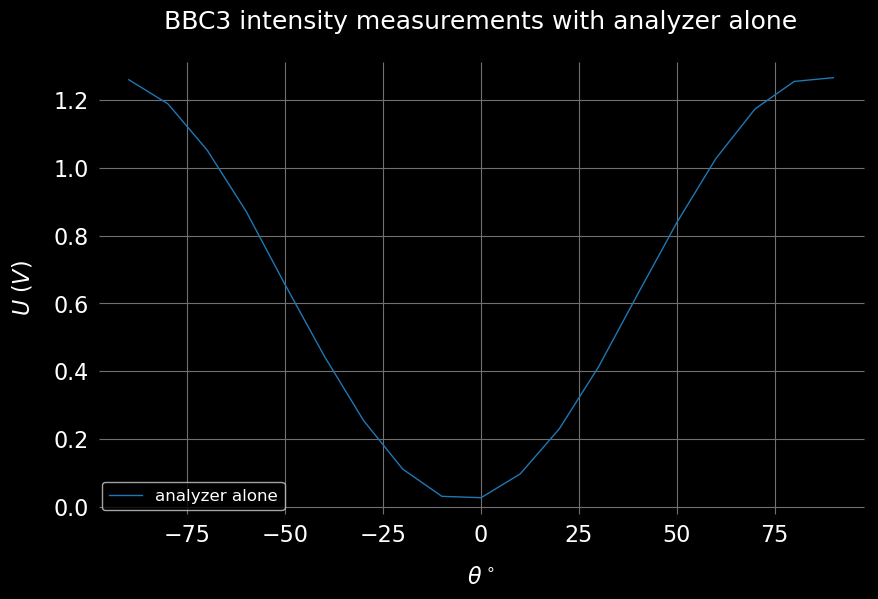

<IPython.core.display.Latex object>

In [31]:
folder_path = './data/Task2/'
task_2_title_str = ['BBC1', 'BBC2', 'BBC3']
label_str = ['analyzer alone', r'with $\lambda/4$ plate']
for k in range(len(task_2_title_str)):
    csv_files = glob.glob(os.path.join(folder_path + task_2_title_str[k], "*.csv"))
    csv_files.sort(reverse=True)
    data_frames = []

    for file_path in csv_files:
        df = pd.read_csv(file_path)
        df.columns = ['X', 'Y']
        data_frames.append(df)
    
    x_l = []
    y_l = []
    #a, b = 0, 1
    for i, df in enumerate(data_frames):
        x = np.array(df['X'])
        y = np.array(df['Y'])
        #if i == 0: 
        #    b = y.max()
        #    a = y.min()
        #y = a + (y-a)/(b-a)
        x_l.append(x)
        y_l.append(y)
        plt.plot(x, y, label=label_str[i])

    #PLot Settings
    plt.xlabel(r'$\theta^\circ$')
    plt.ylabel(r'$U$ ($V$)')
    plt.grid(True)
    plt.title('%s intensity measurements with analyzer alone' % task_2_title_str[k])
    plt.legend()
    plt.show()
    dy(Lx(r'$Figure\, 2.%d$: %s Light intensity vs analyser angle data plot.' % (2+k,task_2_title_str[k])))


***Analysis***

Using **Fig.2.1** to determine the polarization:
- BBC1 (**Fig.2.2**) : Intensity with analyzer alone varies $\rightarrow$ Non-zero minimum around $\theta=37^\circ$ $\rightarrow$ Minimum intensity at the same angle with $\lambda/4$ plate as in analyzer alone $\rightarrow$ BBC1 produces mixture of linearly polarized and unpolarized light. 
- For both BBC2 (**Fig.2.3**) and BBC3 (**Fig.2.4**) polarization is linear as one observes varying intensity with zero value around $\theta = 60^\circ$ and $\theta = -5^\circ$ respectively. 